In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# To read the data set
data= pd.read_csv("Add_sales_data_2018.csv")
data

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


# 1) check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

<AxesSubplot:>

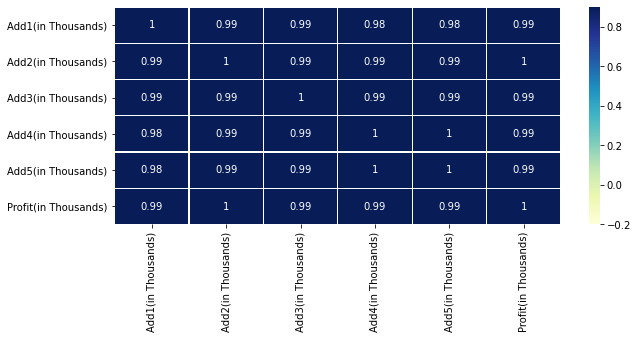

In [8]:
# It is mentioned to find the if there is any correlation between the amount spend by the different add companies and profit generated
#here dependent variable is profit generated and all others are independent variable

cor= data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(cor,vmin= -.2,vmax=.9,annot=True, linewidth=.2,cmap='YlGnBu')

From heatmap it is found out that dependent variable is having a high correlation with all independent variables

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [5]:
data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [9]:
#choose dependent component as y and drop the same component in x 
y=data['Profit(in Thousands)']
x= data.drop(['Date','Profit(in Thousands)'], axis=1)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test= train_test_split(x,y,random_state=42,test_size=.25)
from sklearn import linear_model
lr= linear_model.LinearRegression()
model= lr.fit(x_train,y_train)
predictions=model.predict(x_test)
# to find the actual values
print('\n',y_test)
print('\n predicted values for the following data\n')
# to find the predicted value
print(predictions)


 15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
66     5038.222
111    5491.792
153    5019.997
96     4647.356
38     4486.380
24     4435.174
139    5300.437
112    5425.190
29     4482.183
19     4193.095
178    6062.457
Name: Profit(in Thousands), dtype: float64

 predicted values for the following data

[4152.066 4446.441 5131.898 4907.56  5004.282 4623.793 5384.175 5328.025
 5175.0

In [19]:
# to find error between actual value and predicted value find Mean Square error data

from sklearn.metrics import mean_squared_error
error= mean_squared_error(y_test, predictions)
print("MSE is ", error)

MSE is  6.362927788869444e-25


since the ad companies have high correlation with the profit, MSE is too low

In [15]:
model.score(x_test,y_test)


1.0

In [21]:
data

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


In [28]:
new= data.iloc[:,1:-1]# to omit date column and profit column
x=new.values # to change it into array
y= data["Profit(in Thousands)"].values # to change profit values to array

array([4093.065, 4042.448, 4213.819, 4391.665, 4350.683, 4404.686,
       4418.709, 4470.775, 4425.005, 4446.441, 4411.775, 4435.571,
       4464.11 , 4434.805, 4379.901, 4152.066, 4175.677, 4326.782,
       4190.965, 4193.095, 4178.008, 4390.996, 4523.704, 4465.95 ,
       4435.174, 4436.321, 4451.999, 4453.773, 4416.136, 4482.183,
       4598.292, 4617.695, 4566.31 , 4513.6  , 4461.325, 4419.421,
       4435.816, 4480.363, 4486.38 , 4506.279, 4486.996, 4453.205,
       4432.864, 4672.391, 4648.627, 4606.34 , 4558.651, 4519.061,
       4599.49 , 4643.716, 4548.11 , 4477.226, 4494.144, 4605.783,
       4671.113, 4760.877, 4947.72 , 5071.736, 5133.766, 5190.814,
       5145.131, 5088.455, 5234.487, 5250.775, 5239.06 , 5075.858,
       5038.222, 5001.615, 5004.282, 5030.451, 4977.891, 4916.064,
       4890.723, 4936.12 , 5113.337, 5163.693, 5225.14 , 5187.445,
       5057.155, 5013.207, 5043.705, 5027.633, 5034.726, 4980.446,
       4925.861, 4923.127, 5015.536, 5058.14 , 4937.03 , 4898.


 Coefficent of model is [ 1.   12.38  3.5   1.    0.9 ] 


 intrecpet of model is 9.094947017729282e-13 



# 3 Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

In [70]:
# to find coefficent 
cof= model.coef_
print("\n Coefficent of model is", cof,'\n')


# enter the given independent values as array
new_data= np.array([290,312,309,298,320])

# Equation of the line is 
# y= (M1X1*M2X2*M3X3*..........MnXn)+ C, where M1,M2,M3 are coefficeint and C is the intecept
dotproduct = np.dot(new_data,cof) # (M1X1*M2X2*M3X3*..........MnXn)

# to find Intercept 
intercept = model.intercept_
print("\n intrecpet of model is", intercept,'\n') #C

Profit= dotproduct+intercept #(M1X1*M2X2*M3X3*..........MnXn)+ C
print("Predicted profit generated is Rs ",Profit)



 Coefficent of model is [ 1.   12.38  3.5   1.    0.9 ] 


 intrecpet of model is 9.094947017729282e-13 

Predicted profit generated is  5820.060000000001


#Forcasted profit of the company if the spend the given amount for advertisement is Rs 5820.06